# Introduction to Pandas

### What is Pandas?

Pandas is a library open-source, particularly designed to work simply and intuitively with relation or labeling data. It includes several data formats and procedures for numerical data and time series manipulation. It's built on the top of the library of NumPy. Pandas is quick and user productivity and performance.

The advantages of using Pandas in python:
- Fast and efficient for manipulating and analyzing data
- Data from different file objects can be loaded.
- Easy handaling of missing data (Represented as NaN) in floating point as well as non-floating point data
- Size mutability: Columns can be inserted and deleted from DataFrame and higher dimensional objects
- Data set merging and joining
- Flexible reshaping and pivoting of data sets
- Provides time-series functionality.
- Powerful group by functionality for performing split-apply-combine operations on data sets.

### Why is Pandas is used for Data science?

Pandas are used in conjunction with other libraries that are used for data science. It is constructed on the top of the NumPy library, meaning that many NumPy structures are used in Panda or reproduced.  The data produced by Pandas are often used as input for plotting functions of Matplotlib, statistical analysis in SciPy, machine learning algorithms in Scikit-learn. Pandas program can be run from any text editor but it is recommended to use Jupyter Notebook for this as Jupyter given the ability to execute code in a particular cell rather than executing the entire file. Jupyter also offers a simple way to view data frames and plots from pandas.

### Getting Started with Pandas

In [ ]:
import pandas as pd

Pandas generally provide two data structures for manipulating data:
- DataFrame
- Series

### Series

The Pandas-Series is a one-dimensional labelled array capable of holding data of any type. The Pandas Series is just a column in an excel sheet. It is not necessary for labels to be unique, but they must be of a hashable type. The object supports both integer and label-based indexing, as well as a variety of index-related operations.

#### Creating a Pandas Series

In [1]:
import pandas as pd
import numpy as np

# simple array
data = np.array(['a', 'b', 'c', 'd'])

series = pd.Series(data)
print(series)

0    a
1    b
2    c
3    d
dtype: object


#### Creating a Series from Lists

In [2]:
import pandas as pd

# a simple list
list = ['a', 'b', 'c', 'd', 'e']

# create series form a list
series = pd.Series(list)
print(series)

0    a
1    b
2    c
3    d
4    e
dtype: object


#### Accessing element of Series

There are two ways through which we can access element of series:
- Accessing Element from Series with Position
- Acessing Element using Label (Index)

Acessing Element from Series with Position:

In [5]:
import pandas as pd
import numpy as np

data = np.array (['a','b','c','d'])
series = pd.Series(data)

#Retrieve the first element
print(series[:2])

0    a
1    b
dtype: object


Acessing Element using label(Index):

In [6]:
import pandas as pd
import numpy as npp

#Creating simple array
data = np.array(['a','b','c','d','e'])
series = pd.Series(data,index=[1,2,3,4,5])

print(series[5])

e


### DataFrame

Pandas DataFrame is a two-dimensional size-mutable, potentially heterogenous tabular data structure with labeled axes. A data frame is a two-dimensional data structure. Pandas DataFrame consists of three principal components, the data,rows and columns

#### Creating a DataFrame:

In [8]:
import pandas as pd

df = pd.DataFrame()
print(df)

lst = ['Apple','Banana','Cucumber','Dandelion']

df = pd.DataFrame(lst)
print(df)

Empty DataFrame
Columns: []
Index: []
           0
0      Apple
1     Banana
2   Cucumber
3  Dandelion


# Introduction to ETL

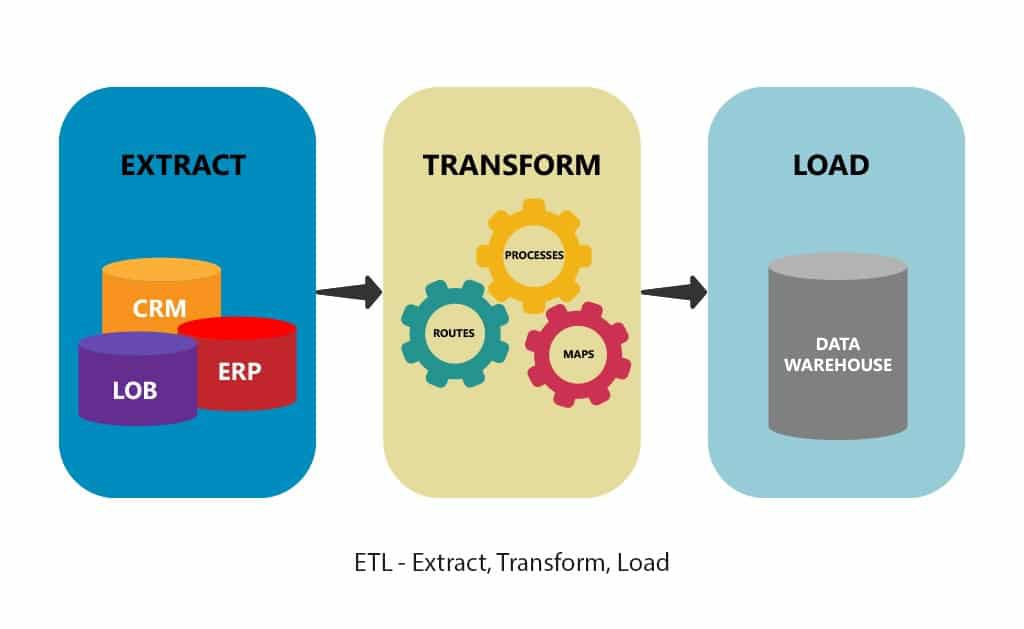

reference: https://medium.com/analytics-vidhya/understanding-etl-pipeline-76718d299a08

ETL stands for Extract Transform and Load. It is the process of collecting data from one or more systems, transforming it to the desired form before pushing it to the data database. ETL also allows data to be migrated from many sources, destinations and analytical tools. The organizational data might be organized and unstructured. The ETL process allows all data to be placed under a single roof, so that business information can be generated.

ETL is a 3 steps process:

- Extracting Data from single or multiple Data Sources
- Transoforming Data as per business logic. Transformation is in itself a two steps process- data cleansing and data manipulation.
- Loading transformed data into the target data source or data warehouse.

### ETL Example

Import the functions and required modules for this example

In [9]:
import pandas as pd
import xml.etree.ElementTree as ET
import glob
from datetime import datetime

Download the files by running the code below

In [10]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/datasource.zip

--2021-09-14 17:23:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/datasource.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4249 (4.1K) [application/zip]
Saving to: 'datasource.zip'

     0K ....                                                  100% 3.04G=0s

2021-09-14 17:23:07 (3.04 GB/s) - 'datasource.zip' saved [4249/4249]



Set the path for the target files

In [12]:
tmpfile    = "dealership_temp.tmp"               # store all extracted data
logfile    = "dealership_logfile.txt"            # all event logs will be stored
targetfile = "dealership_transformed_data.csv"   # transformed data is stored

## Extract

The function of extract is that it will extract large amounts of data from multiple sources in batches. By adding this feature, all CSV file names will now be discovered and loaded, and CSV files will be added with each iteration in the date frame, with first and second iteration attached, which results in a list of extracted information. We'll move on to the "Transform" step of the process after we've gathered the data.

##### CSV Extract Function

In [15]:
def extract_from_csv(file_to_process):
    dataframe = pd.read_csv(file_to_process)
    return dataframe

##### JSON Extract Function

In [16]:
def extract_from_json(file_to_process):
    dataframe = pd.read_json(file_to_process,lines=True)
    return dataframe

##### XML Extract Function

In [17]:
def extract_from_xml(file_to_process):

    dataframe = pd.DataFrame(columns=['car_model','year_of_manufacture','price', 'fuel'])

    tree = ET.parse(file_to_process) 

    root = tree.getroot() 

    for person in root: 

        car_model = person.find("car_model").text 

        year_of_manufacture = int(person.find("year_of_manufacture").text)

        price = float(person.find("price").text) 

        fuel = person.find("fuel").text 

        dataframe = dataframe.append({"car_model":car_model, "year_of_manufacture":year_of_manufacture, "price":price, "fuel":fuel}, ignore_index=True) 

        return dataframe

To extract, call the extract function using its function call for CSV, JSON, XML respectively

In [22]:
def extract():
    extracted_data = pd.DataFrame(columns=['car_model','year_of_manufacture','price', 'fuel']) 
    #for csv files
    for csvfile in glob.glob("dealership_data/*.csv"):
        extracted_data = extracted_data.append(extract_from_csv(csvfile), ignore_index=True)
    #for json files
    for jsonfile in glob.glob("dealership_data/*.json"):
        extracted_data = extracted_data.append(extract_from_json(jsonfile), ignore_index=True)
    #for xml files
    for xmlfile in glob.glob("dealership_data/*.xml"):
        extracted_data = extracted_data.append(extract_from_xml(xmlfile), ignore_index=True)
    return extracted_data

## Transform

Once the data is gathered, Transform phase is the next step of the process. This function will convert the height of the column, in inches, into millimeters and the column pounds, into kilograms, and the results will be returned to the variable data. The column height will be at feet in the input data frame. Turn the column to meters and round it to two decimals.

In [23]:
def transform(data):
    data['price'] = round(data.price, 2)
    return data

### Load

Now that we've gathered it, it's time to put the data into the target file. In this situation, we store pandas data as a CSV. We have now taken the steps to extract, convert and load data from several sources into a single destination file. A logging entry is needed to be establish. This can be achieved by writing a logging function

##### Load Function:

In [24]:
def load(targetfile,data_to_load):
    data_to_load.to_csv(targetfile)

##### Log Function:

In [25]:
def log(message):
    timestamp_format = '%H:%M:%S-%h-%d-%Y'
    #Hour-Minute-Second-MonthName-Day-Year
    now = datetime.now() # get current timestamp
    timestamp = now.strftime(timestamp_format)
    with open("dealership_logfile.txt","a") as f: f.write(timestamp + ',' + message + 'n')

Reference:
1. https://www.analyticsvidhya.com/blog/2021/06/implementing-python-to-learn-data-engineering-etl-process/#h2_4
2. https://www.analyticsvidhya.com/blog/2021/05/pandas-vs-petl-for-etl/
3. https://medium.datadriveninvestor.com/understanding-extract-transform-and-load-etl-and-its-necessity-in-data-analytics-world-with-an-64346016153d
4. https://www.geeksforgeeks.org/introduction-to-pandas-in-python/
5. https://www.youtube.com/watch?v=oY62o-tBHF4&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy&index=11